In [ ]:
#Importing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from tqdm import tqdm
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading Data
file = pd.read_csv(r"/content/cirrhosis.csv")
file = file.dropna()
file.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
#Data Preprocessing
file.drop(['ID'], axis = 1, inplace = True)

In [ ]:
#Converting Values from Days to Years in "Age" Column
file["Age"] = (file["Age"] / 365)
file["Age"] = file["Age"].astype("int64")

data = file.iloc[:, :len(file.columns) - 1]
labels = file.iloc[:, len(file.columns)-1]
class_names = labels.unique()

In [ ]:
file.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
#Data Analysis
file.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1979.166667,49.322464,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507,3.039855
std,1112.380295,10.523791,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315,0.853999
min,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000,1.000000
25%,1185.750000,41.000000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000,2.000000
50%,1788.000000,49.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000,3.000000
75%,2689.750000,56.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000,4.000000
max,4556.000000,78.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


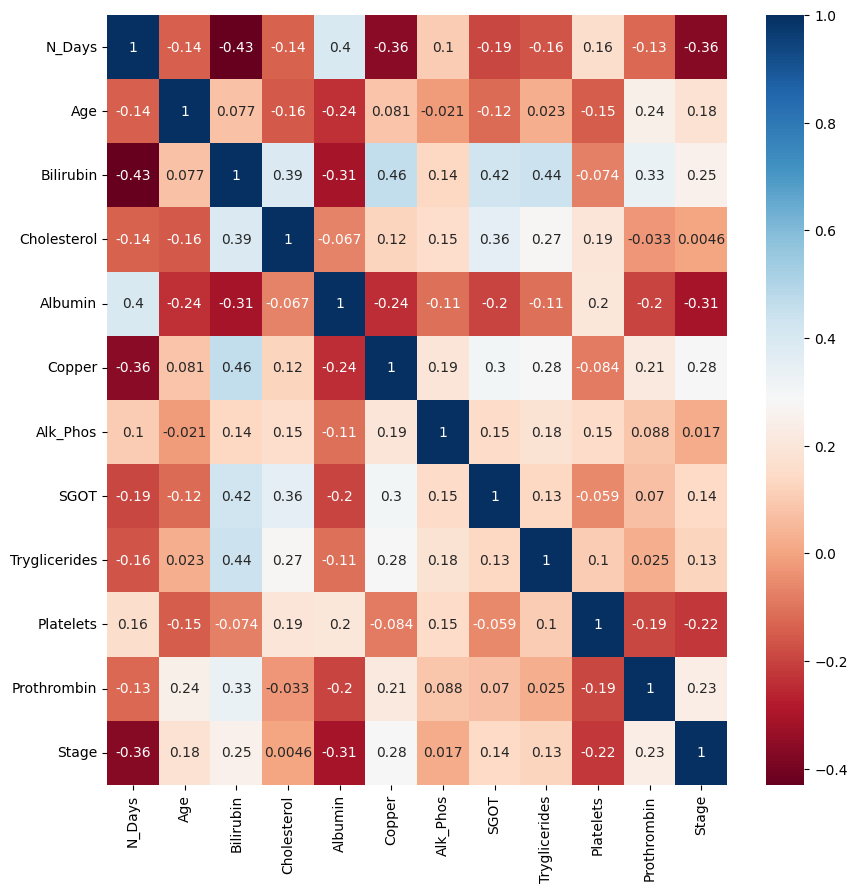

In [ ]:
#Data Visualization
plt.figure(figsize=(10,10))
sns.heatmap(file.corr(), cmap="RdBu", annot=True)
plt.show()

In [ ]:
#Splitting Dataset
data = pd.get_dummies(data)

In [ ]:
#Feature Selection

best = SelectKBest( score_func = chi2, k = 6)
fit = best.fit(data, labels)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.25, shuffle = True)

print(f"Shape of Train Images : {np.shape(x_train)}")
print(f"Shape of Test Images : {np.shape(x_test)}")
print(f"Shape of Train Labels : {np.shape(y_train)}")
print(f"Shape of Test Labels : {np.shape(y_test)}")

Shape of Train Images : (207, 27)
Shape of Test Images : (69, 27)
Shape of Train Labels : (207,)
Shape of Test Labels : (69,)


Classification Report of Logistic Regression : 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.50      0.06      0.10        18
         3.0       0.31      0.80      0.45        20
         4.0       0.62      0.36      0.45        28

    accuracy                           0.39        69
   macro avg       0.36      0.30      0.25        69
weighted avg       0.47      0.39      0.34        69

Confusion Matrix of Logistic Regression: 



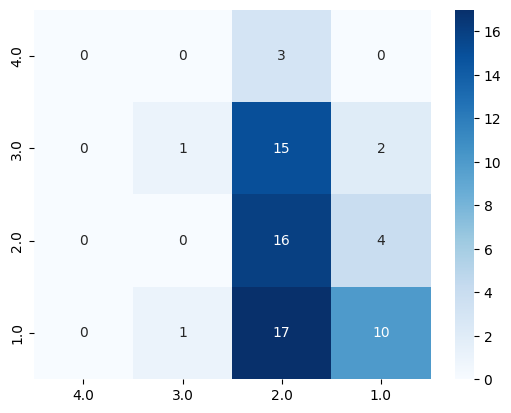

In [ ]:
#Logistic Regression
lor_model = LogisticRegression(random_state=1, max_iter=1000)
lor_model.fit(x_train, y_train)

lor_pred = lor_model.predict(x_test)
lor_cm = confusion_matrix(y_test, lor_pred)

print(f"Classification Report of Logistic Regression : \n {classification_report(y_test, lor_pred)}")

print(f"Confusion Matrix of Logistic Regression: \n")
sns.heatmap(lor_cm,cmap = 'Blues',annot = True, xticklabels = class_names, yticklabels = class_names)
plt.show()

In [ ]:
from sklearn import metrics

lor_accuracy_score = metrics.accuracy_score(y_test, lor_pred)
print(f"Accuracy score of Logistic Regression : {lor_accuracy_score:.2f}")


Accuracy score of Logistic Regression : 0.39
